**Let us explore the data set and identify the high rated shows on Amazon Prime**

In [29]:

import numpy as np
import pandas as pd
from collections import Counter
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [30]:
# Reading the data set
tv_shows = pd.read_csv("Dataset.csv",encoding='unicode_escape')

Amazon Prime is a paid subscription program from Amazon that gives users access to additional services otherwise unavailable or available at a premium to regular Amazon customers. Services include same, one or two-day delivery and streaming music and video.
In January 2020, Amazon reported that Prime had more than 150 million subscribers worldwide.<br>

The Prime Video service debuted on September 7, 2006 as Amazon Unbox in the United States. On September 4, 2008, the service was renamed Amazon Video on Demand. The Unbox name still refers to the local program, which as of August 2014 is no longer available for downloading purchased instant videos. On February 22, 2011, the service rebranded as Amazon Instant Video.

**Exploratory Data Analysis**

In [31]:
# Let us look at the shape of the data
tv_shows.shape

(404, 8)

So we can see that there are 503 rows and 8 columns or attributes in the data set, which means there are 503 TV shows of different categories or genres available on Prime.

In [32]:
# Visualizing the first few rows of the data set
tv_shows.head(3)

,S.no.,Name of the show,Year of release,No of seasons available,Language,Genre,IMDb rating,Age of viewers
0,1,Pataal Lok,2020.0,1.0,Hindi,Drama,7.5,18+
1,2,Upload,2020.0,1.0,English,Sci-fi comedy,8.1,16+
2,3,The Marvelous Mrs. Maisel,2017.0,3.0,English,"Drama, Comedy",8.7,16+


In [33]:
# Let us take a look at the data types of each variable
tv_shows.dtypes

S.no.                        int64
Name of the show            object
Year of release            float64
No of seasons available    float64
Language                    object
Genre                       object
IMDb rating                float64
Age of viewers              object
dtype: object

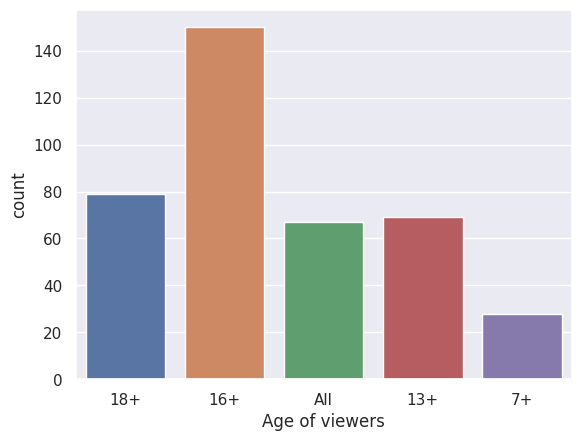

In [34]:
# Looking at the age of viewers
import seaborn as sns
sns.set(style="darkgrid")
ax = sns.countplot(x = "Age of viewers", data = tv_shows)

Here we can see that most of the shows are either 16+ (adult shows) or are for all age groups.

<Axes: xlabel='count', ylabel='Language'>

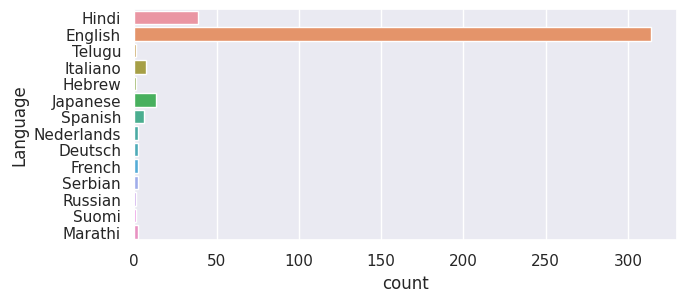

In [35]:
# Let us take a look at the languages in which TV shows are being offered
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(7, 3))
sns.countplot(y = "Language", data = tv_shows)

Here we can see that most of the shows are having audio language as 'English', while he second audio language is 'Hindi'. This means that most of the shows on Amazon Prime are either Hindi or English while TV shows in other languages such as Japanese, Italian, Spanish are very less.

<Axes: xlabel='count', ylabel='Genre'>

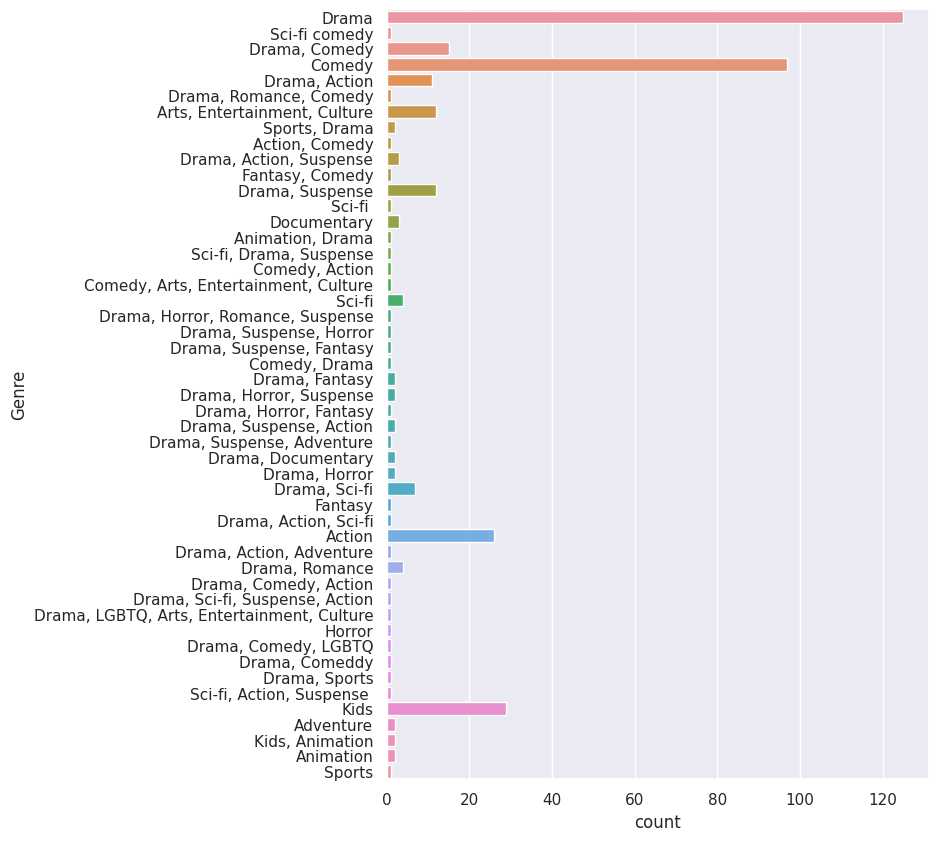

In [36]:
# Let us take a look at the genres of the TV shows
f, ax = plt.subplots(figsize=(7, 10))
sns.countplot(y = "Genre", data = tv_shows)

We can see that most of the shows available are of the genre: 'drama', 'comedy' or are for 'kids'.

<Axes: xlabel='count', ylabel='No of seasons available'>

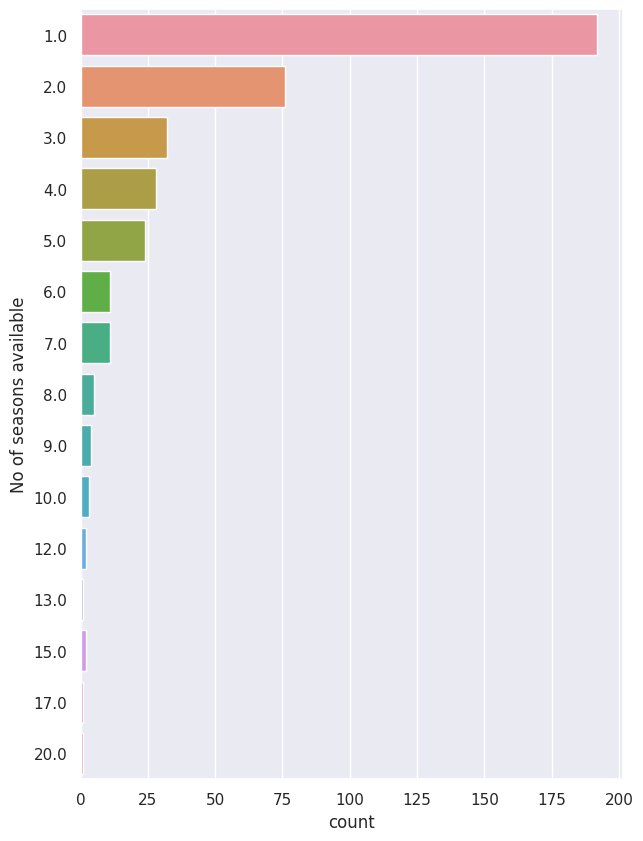

In [37]:
# Let us take a look at how many seasons of the show are available on Prime
f, ax = plt.subplots(figsize=(7, 10))
sns.countplot(y = "No of seasons available", data = tv_shows)

We can see here that only season 1 is available for most of the TV shows. While for some TV shows all the seasons are available on Prime, upto 9 or 10 seasons.

In [38]:
# Let us now check for missing values
tv_shows.isnull().sum()

S.no.                        0
Name of the show            11
Year of release             11
No of seasons available     11
Language                    11
Genre                       11
IMDb rating                222
Age of viewers              11
dtype: int64

We can see that the variable IMDb ratings has the most missing values while there are no other missing values in any column.

We can fill or replace the missing values. In some cases, we can delete the rows with missing values and in some cases we can replace the missing values.But dropping rows or columns with missing values can lead to loss of information and precision. So we need to handle these missing values or replace them.

<Axes: xlabel='Age of viewers', ylabel='IMDb rating'>

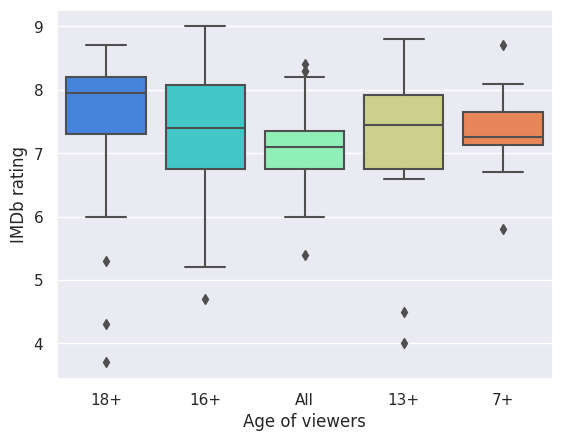

In [39]:
# Checking for outliers
sns.boxplot(x ='Age of viewers',y = 'IMDb rating',data = tv_shows,palette ='rainbow')

Since there are many outliers we will replace the missing value with the median value for the IMDb rating.

In [40]:
# Replace using median
median = tv_shows['IMDb rating'].median()
tv_shows['IMDb rating'].fillna(median, inplace=True)

Let us now check whether the missing values have been replaced or not.

In [41]:
tv_shows.isnull().sum()

S.no.                       0
Name of the show           11
Year of release            11
No of seasons available    11
Language                   11
Genre                      11
IMDb rating                 0
Age of viewers             11
dtype: int64

Now we can see that we don't have any missing values.

In [42]:
# Let us take a look at the top 20 high rated shows on Amazon Prime
tv_shows.sort_values(by = "IMDb rating", ascending = False).head(20)

,S.no.,Name of the show,Year of release,No of seasons available,Language,Genre,IMDb rating,Age of viewers
20,21,The Test: A New Era for Australia's Team,2020.0,1.0,English,Documentary,9.0,16+
281,282,Seinfeld,1990.0,9.0,English,Comedy,8.8,13+
37,38,Hostel Daze,2019.0,1.0,Hindi,"Drama, Comedy",8.7,16+
49,50,Downtown Abbey,2010.0,6.0,English,Drama,8.7,7+
12,13,The Boys,2019.0,2.0,English,"Action, Comedy",8.7,18+
51,52,This is Us,2017.0,3.0,English,Drama,8.7,16+
340,341,The Grand Tour,2017.0,4.0,English,Sports,8.7,16+
4,5,Fleabag,2016.0,2.0,English,Comedy,8.7,18+
2,3,The Marvelous Mrs. Maisel,2017.0,3.0,English,"Drama, Comedy",8.7,16+
8,9,The Family Man,2019.0,1.0,Hindi,"Drama, Action",8.6,18+


In [43]:
# Let us now take a look at 20 worst rated shows
tv_shows.sort_values(by = "IMDb rating", ascending = True).head(20)

,S.no.,Name of the show,Year of release,No of seasons available,Language,Genre,IMDb rating,Age of viewers
367,368,Ilana Glazer: The Planet is Burning,2020.0,1.0,English,Comedy,3.7,18+
162,163,Tokyo Alice,2019.0,1.0,Japanese,Drama,4.0,13+
243,244,Skulls and Roses,2019.0,1.0,Hindi,Action,4.3,18+
375,376,Businessmen VS Aliens,2018.0,1.0,Japanese,Comedy,4.5,13+
317,318,Alice Wettlund: My Mama is a Human and So Am I,2019.0,1.0,English,Comedy,4.7,16+
175,176,Final Life,2019.0,1.0,Japanese,Drama,5.2,16+
3,4,Four More Shots Please,2019.0,2.0,Hindi,"Drama, Comedy",5.3,18+
355,356,#IMomSoHard Live,2019.0,1.0,English,Comedy,5.4,16+
341,342,The Adventures of Rocky and Bullwinkle,2018.0,2.0,English,Kids,5.4,All
352,353,Alonzo Bodden: Heavy Lightweight,2019.0,1.0,English,Comedy,5.6,16+


**Let us now look at the top rated TV shows across different languages, genres as well as age categories**

In [44]:
top_english = tv_shows[tv_shows['Language'] == 'English'].sort_values(by = 'IMDb rating',ascending = False)
#Top 10 TV shows in english
top_english.head(10)

,S.no.,Name of the show,Year of release,No of seasons available,Language,Genre,IMDb rating,Age of viewers
20,21,The Test: A New Era for Australia's Team,2020.0,1.0,English,Documentary,9.0,16+
281,282,Seinfeld,1990.0,9.0,English,Comedy,8.8,13+
4,5,Fleabag,2016.0,2.0,English,Comedy,8.7,18+
340,341,The Grand Tour,2017.0,4.0,English,Sports,8.7,16+
12,13,The Boys,2019.0,2.0,English,"Action, Comedy",8.7,18+
2,3,The Marvelous Mrs. Maisel,2017.0,3.0,English,"Drama, Comedy",8.7,16+
51,52,This is Us,2017.0,3.0,English,Drama,8.7,16+
49,50,Downtown Abbey,2010.0,6.0,English,Drama,8.7,7+
47,48,Shameless,2011.0,10.0,English,"Comedy, Drama",8.6,18+
40,41,Dexter,2006.0,8.0,English,Drama,8.6,18+


In [45]:
# Top 10 TV shows in Hindi
top_hindi = tv_shows[tv_shows['Language'] == 'Hindi'].sort_values(by = 'IMDb rating',ascending = False)
#Top 10 TV shows in hindi
top_hindi.head(10)

,S.no.,Name of the show,Year of release,No of seasons available,Language,Genre,IMDb rating,Age of viewers
37,38,Hostel Daze,2019.0,1.0,Hindi,"Drama, Comedy",8.7,16+
8,9,The Family Man,2019.0,1.0,Hindi,"Drama, Action",8.6,18+
7,8,Mirzapur,2018.0,1.0,Hindi,Drama,8.5,18+
16,17,Breathe,2018.0,1.0,Hindi,"Drama, Suspense",8.4,16+
5,6,Made in Heaven,2019.0,1.0,Hindi,Drama,8.3,18+
299,300,Best of AIB,2014.0,1.0,Hindi,Comedy,8.2,16+
11,12,Inside Edge,2017.0,2.0,Hindi,"Sports, Drama",8.0,18+
17,18,The Forgotten Army- Azaadi ke Liye,2020.0,1.0,Hindi,"Drama, Action",8.0,18+
83,84,Bang Baaja Baaraat,2015.0,1.0,Hindi,Drama,8.0,18+
0,1,Pataal Lok,2020.0,1.0,Hindi,Drama,7.5,18+


**Since most of the shows are of the genres: 'Drama', 'Comedy' and 'Kids'. Let us look at the top rated shows in each of these genres**

In [46]:
# Top 10 TV shows in the genre: 'Drama'
top_drama = tv_shows[tv_shows['Genre'] == 'Drama'].sort_values(by = 'IMDb rating',ascending = False)
#Top 10 TV shows in drama
top_drama.head(10)

,S.no.,Name of the show,Year of release,No of seasons available,Language,Genre,IMDb rating,Age of viewers
49,50,Downtown Abbey,2010.0,6.0,English,Drama,8.7,7+
51,52,This is Us,2017.0,3.0,English,Drama,8.7,16+
105,106,Mad Men,2007.0,7.0,English,Drama,8.6,16+
40,41,Dexter,2006.0,8.0,English,Drama,8.6,18+
7,8,Mirzapur,2018.0,1.0,Hindi,Drama,8.5,18+
28,29,Suits,2011.0,8.0,English,Drama,8.5,16+
85,86,The Handmaid's Tale,2017.0,3.0,English,Drama,8.5,18+
76,77,Bosch,2015.0,6.0,English,Drama,8.4,18+
142,143,Ray Donovan,2013.0,6.0,English,Drama,8.3,All
154,155,Life,2007.0,2.0,English,Drama,8.3,All


In [47]:
# Top 10 TV shows in the genre: 'Comedy'
top_comedy = tv_shows[tv_shows['Genre'] == 'Comedy'].sort_values(by = 'IMDb rating',ascending = False)
#Top 10 TV shows in comedy
top_comedy.head(10)

,S.no.,Name of the show,Year of release,No of seasons available,Language,Genre,IMDb rating,Age of viewers
281,282,Seinfeld,1990.0,9.0,English,Comedy,8.8,13+
4,5,Fleabag,2016.0,2.0,English,Comedy,8.7,18+
261,262,Mr. Bean,1995.0,1.0,English,Comedy,8.5,16+
293,294,Californication,2007.0,7.0,English,Comedy,8.3,18+
299,300,Best of AIB,2014.0,1.0,Hindi,Comedy,8.2,16+
312,313,Trial and Error,2017.0,2.0,English,Comedy,8.0,13+
374,375,Hitoshi Matsumoto Presents Documental,2018.0,3.0,Japanese,Comedy,8.0,18+
330,331,EIC vs The World,2017.0,1.0,English,Comedy,8.0,16+
315,316,Red Oaks,2015.0,3.0,English,Comedy,7.9,18+
347,348,People of Earth,2016.0,2.0,English,Comedy,7.7,All


In [48]:
# Top 10 TV shows in the genre: 'Kids'
top_kids = tv_shows[tv_shows['Genre'] == 'Kids'].sort_values(by = 'IMDb rating',ascending = False)
#Top 10 TV shows for kids
top_kids.head(10)

,S.no.,Name of the show,Year of release,No of seasons available,Language,Genre,IMDb rating,Age of viewers
296,297,Munki and Trunk,2016.0,1.0,English,Kids,8.4,All
226,227,Lost in Oz,2017.0,2.0,English,Kids,7.7,7+
224,225,Super Wings,2016.0,3.0,English,Kids,7.5,All
287,288,Cat vs Keet,2015.0,1.0,English,Kids,7.5,All
386,387,Gattu- The Power Champ,2019.0,2.0,Hindi,Kids,7.5,7+
385,386,Paprika,2017.0,1.0,English,Kids,7.5,All
370,371,Kung Fu Bunny,2016.0,1.0,English,Kids,7.5,13+
345,346,Atchoo,2018.0,1.0,Hindi,Kids,7.5,All
343,344,Chacha Bhatija,2016.0,2.0,Hindi,Kids,7.5,7+
323,324,Bananas in Pyjamas,2012.0,2.0,English,Kids,7.5,All


In [49]:
# Let us now look at the top 10 best shows released this year which are a must watch
top10 = tv_shows[tv_shows['Year of release'] == 2020].sort_values(by ='IMDb rating',ascending = False)
#Top 10 TV shows of 2020
top10.head(10)

,S.no.,Name of the show,Year of release,No of seasons available,Language,Genre,IMDb rating,Age of viewers
20,21,The Test: A New Era for Australia's Team,2020.0,1.0,English,Documentary,9.0,16+
1,2,Upload,2020.0,1.0,English,Sci-fi comedy,8.1,16+
17,18,The Forgotten Army- Azaadi ke Liye,2020.0,1.0,Hindi,"Drama, Action",8.0,18+
73,74,Star Trek: Picard,2020.0,1.0,English,Sci-fi,7.6,18+
0,1,Pataal Lok,2020.0,1.0,Hindi,Drama,7.5,18+
305,306,Dilruk Jayasinha: Bundle of Joy,2020.0,1.0,English,"Arts, Entertainment, Culture",7.5,16+
354,355,LOL: Australia,2020.0,1.0,English,Comedy,7.5,All
349,350,Tom Walker: Very Very,2020.0,1.0,English,Comedy,7.5,16+
339,340,Zoe Coombs Marr: Bossy Bottom,2020.0,1.0,English,Comedy,7.5,18+
337,338,Alice Fraser: Savage,2020.0,1.0,English,Comedy,7.5,16+


### Most used words in the Title of the TV shows

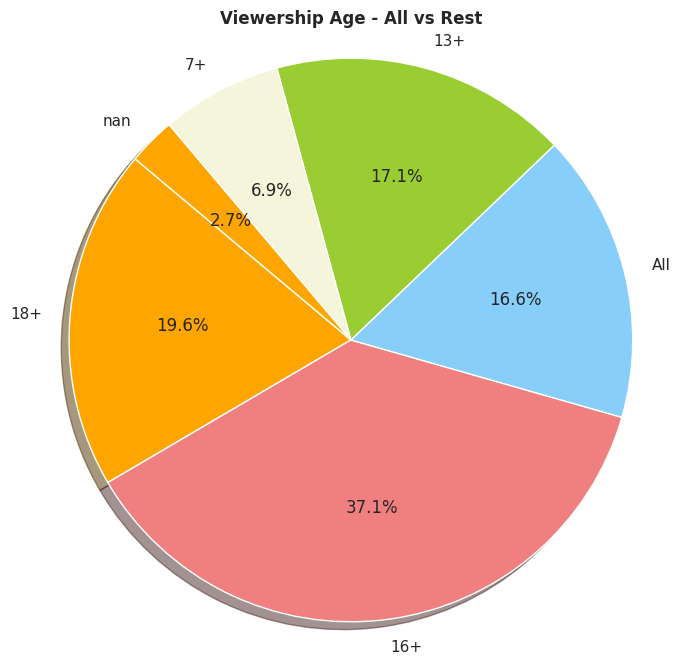

In [51]:
sizes = Counter(tv_shows['Age of viewers']).values()
labels = Counter(tv_shows['Age of viewers']).keys()

explode = (0.1, 0.1, 0.1, 0.1, 0.1)

# Creating color parameters
colors = ( "orange", "lightcoral",
          "lightskyblue", "yellowgreen", "beige")
# Plot
plt.figure(figsize=(8,8))
plt.title("Viewership Age - All vs Rest",fontweight='bold')
plt.pie(sizes, explode=None, labels=labels, colors=colors,shadow=True,autopct='%1.1f%%',startangle=140)
plt.axis('equal')
plt.show()